<a href="https://colab.research.google.com/github/ddarshana04/Machine-Learning/blob/main/Credit_Card_Fraud_Detection/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import numpy as np
import pandas as pd

# For visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.max_rows = None #to show all rows
pd.options.display.max_columns = None #to show all columns

# For encoding categorical data
from sklearn.preprocessing import OneHotEncoder

# For scaling
from sklearn.preprocessing import RobustScaler

# For splitting data
from sklearn.model_selection import train_test_split

# For modelling
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import PolynomialFeatures

# For evaluation
from sklearn.metrics import confusion_matrix, f1_score, classification_report, roc_auc_score, roc_curve

In [36]:
# Aesthetics
sns.set_style('darkgrid')
sns.set_palette('Set2')
mpl_color = sns.color_palette('Set2')

# Plot features universal settings
plt.rc('axes', titlesize=18)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=13)
plt.rc('ytick', labelsize=13)
plt.rc('legend', fontsize=13)
plt.rc('font', size=13)

In [37]:
df = pd.read_csv('creditcard.csv')

In [38]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202103 entries, 0 to 202102
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    202103 non-null  float64
 1   V1      202103 non-null  float64
 2   V2      202103 non-null  float64
 3   V3      202103 non-null  float64
 4   V4      202103 non-null  float64
 5   V5      202103 non-null  float64
 6   V6      202103 non-null  float64
 7   V7      202103 non-null  float64
 8   V8      202103 non-null  float64
 9   V9      202103 non-null  float64
 10  V10     202103 non-null  float64
 11  V11     202103 non-null  float64
 12  V12     202103 non-null  float64
 13  V13     202103 non-null  float64
 14  V14     202103 non-null  float64
 15  V15     202103 non-null  float64
 16  V16     202103 non-null  float64
 17  V17     202103 non-null  float64
 18  V18     202103 non-null  float64
 19  V19     202103 non-null  float64
 20  V20     202103 non-null  float64
 21  V21     20

In [40]:
df1 = df.copy()
df.drop('Time', axis = 1, inplace = True)
print(df.head())

         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   

        V15       V16       V17       V18       V19       V20       V21  \
0  1.468177 -0.470401  

In [41]:
dup = df[df.duplicated()]
print("Number of duplicated records total:", len(dup))
print("Number of duplicated records in Fraud cases:", len(dup[dup["Class"]==1]))
print("Number of duplicated records in No Fraud cases:", len(dup[dup["Class"]==0]))

Number of duplicated records total: 5847
Number of duplicated records in Fraud cases: 18
Number of duplicated records in No Fraud cases: 5829


In [42]:
total = len(df)
df.drop_duplicates(inplace=True)
print(total - len(df), " duplicated records removed")
print("Total records left:", len(df))

5847  duplicated records removed
Total records left: 196256


Number of fraud cases out of 196256 total cases : 369
Number of non-fraud cases out of 196256 total cases : 195886
Percentage of fraud cases : 0.188


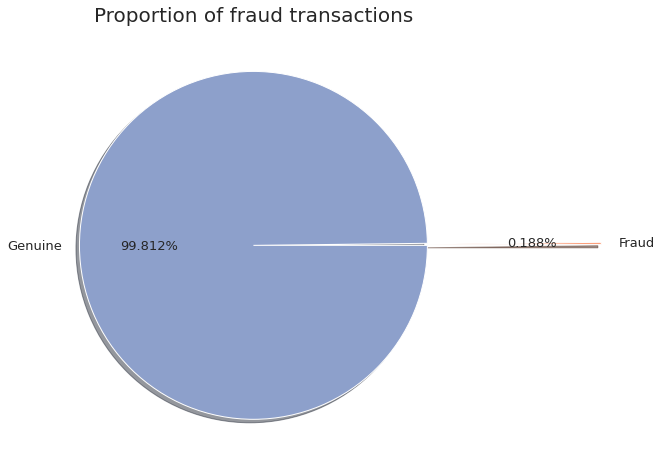

In [43]:
cases = len(df)
nonfraud_count = len(df[df.Class == 0])
fraud_count = len(df[df.Class == 1])
fraud_percentage = round(fraud_count/cases*100, 3)
print("Number of fraud cases out of {} total cases :".format(cases), fraud_count)
print("Number of non-fraud cases out of {} total cases :".format(cases), nonfraud_count)
print("Percentage of fraud cases :", fraud_percentage)

plt.figure(figsize = (8, 8))
pie_data = [df.Class[df["Class"] == 1].count(), df.Class[df["Class"] == 0].count()]
pie_labels = ["Fraud", "Genuine"]
plt.pie(pie_data, labels = pie_labels, explode = [1, 0], shadow = True, colors = mpl_color[1:3], autopct = "%.3f%%")
plt.title("Proportion of fraud transactions", size = 20)
plt.show()

In [44]:
print(df[df["Class"]==0].Amount.describe()),
print(df[df["Class"]==1].Amount.describe())

count    195886.000000
mean         91.685773
std         251.516311
min           0.000000
25%           6.780000
50%          24.770000
75%          80.957500
max       19656.530000
Name: Amount, dtype: float64
count     369.000000
mean      123.283496
std       259.688525
min         0.000000
25%         1.000000
50%        12.310000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


In [45]:
scaler = RobustScaler()
df["Amount"] = scaler.fit_transform(df[["Amount"]])

In [46]:
X_orig = df.loc[:,df.columns != "Class"]
y_orig = df.Class
X_train, X_test, y_train, y_test = train_test_split(X_orig, y_orig, test_size = 0.2)

In [47]:
df_train = pd.concat([X_train, y_train], axis=1)
print("Percentage distribution of fraud cases:", round(len(df_train[df_train.Class == 1])/len(df_train)*100, 3))
print("Number of Fraud cases in Training set:", len(df_train[df_train.Class == 1]))

# Lets shuffle the data before creating the new balanced dataframe
df_train = df_train.sample(frac=1)

fraud_df_train = df_train.loc[df_train['Class'] == 1]
non_fraud_df_train = df_train.loc[df_train['Class'] == 0][:len(fraud_df_train)]

balanced_df_train = pd.concat([fraud_df_train, non_fraud_df_train])

# Shuffle again
balanced_df_train = balanced_df_train.sample(frac=1, random_state=42)
print("Percentage distribution of fraud cases after balancing:", round(len(balanced_df_train[balanced_df_train.Class == 1])/len(balanced_df_train)*100, 3))
print("Number of Fraud cases in Training set after balancing:", len(balanced_df_train[balanced_df_train.Class == 1]))
balanced_df_train.info()

Percentage distribution of fraud cases: 0.189
Number of Fraud cases in Training set: 297
Percentage distribution of fraud cases after balancing: 50.0
Number of Fraud cases in Training set after balancing: 297
<class 'pandas.core.frame.DataFrame'>
Int64Index: 594 entries, 41943 to 154587
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      594 non-null    float64
 1   V2      594 non-null    float64
 2   V3      594 non-null    float64
 3   V4      594 non-null    float64
 4   V5      594 non-null    float64
 5   V6      594 non-null    float64
 6   V7      594 non-null    float64
 7   V8      594 non-null    float64
 8   V9      594 non-null    float64
 9   V10     594 non-null    float64
 10  V11     594 non-null    float64
 11  V12     594 non-null    float64
 12  V13     594 non-null    float64
 13  V14     594 non-null    float64
 14  V15     594 non-null    float64
 15  V16     594 non-null    float64
 16  V17     

In [48]:
balanced_df_train.corr()["Class"][:-1]

V1       -0.448863
V2        0.511498
V3       -0.560708
V4        0.704764
V5       -0.410631
V6       -0.423062
V7       -0.488514
V8        0.092329
V9       -0.545271
V10      -0.633846
V11       0.677910
V12      -0.693831
V13       0.007379
V14      -0.738595
V15      -0.103073
V16      -0.609287
V17      -0.579032
V18      -0.499515
V19       0.269163
V20       0.190803
V21       0.091444
V22       0.061844
V23      -0.017459
V24      -0.069399
V25       0.014191
V26      -0.013417
V27       0.096641
V28       0.054410
Amount    0.023627
Name: Class, dtype: float64

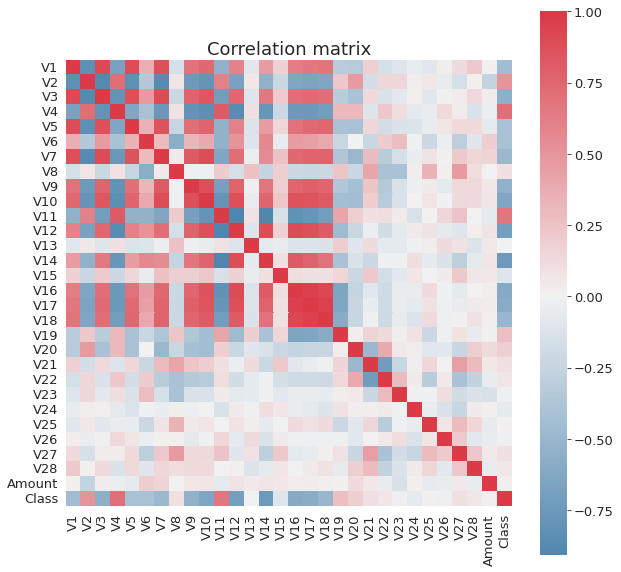

In [49]:
plt.figure(figsize=(10,10))
cmap = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(balanced_df_train.corr(), cmap = cmap, center=0, annot=False, square=True)
plt.title(label="Correlation matrix")
plt.show()

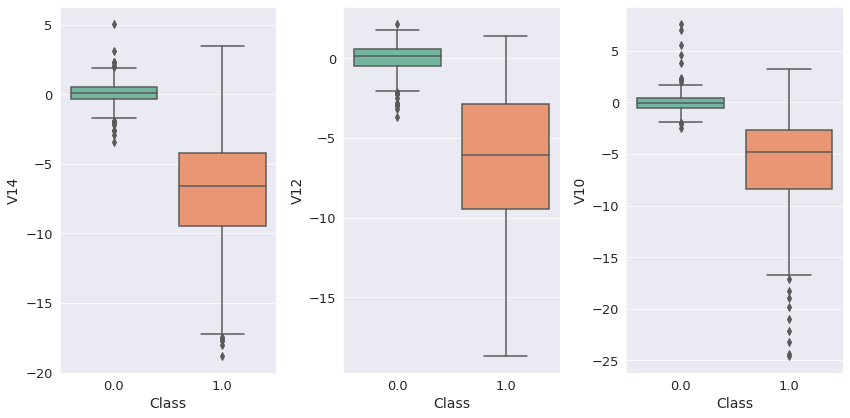

In [50]:
fig, ax = plt.subplots(ncols=3, figsize=(12,6), tight_layout = True)
sns.boxplot(x="Class",y="V14", data=balanced_df_train, ax=ax[0])
sns.boxplot(x="Class",y="V12", data=balanced_df_train, ax=ax[1])
sns.boxplot(x="Class",y="V10", data=balanced_df_train, ax=ax[2])

plt.show()

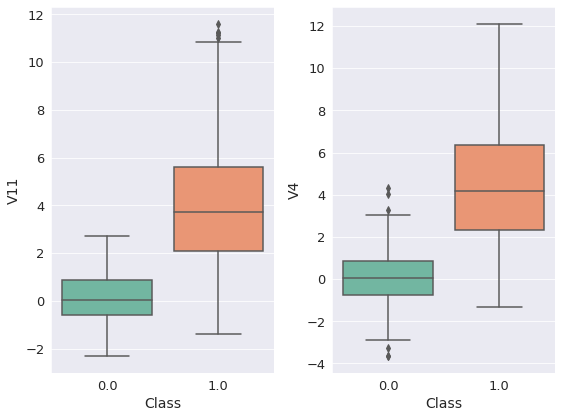

In [51]:
fig, ax = plt.subplots(ncols=2, figsize=(8,6), tight_layout = True)
sns.boxplot(x="Class",y="V11", data=balanced_df_train, ax=ax[0])
sns.boxplot(x="Class",y="V4", data=balanced_df_train, ax=ax[1])

plt.show()

In [52]:
out_features = ["V14", "V12", "V10"]
for feature in out_features:
    Q1 = balanced_df_train[feature].quantile(0.25)
    Q3 = balanced_df_train[feature].quantile(0.75)
    IQR = Q3-Q1
    top = Q3 + 1.5*IQR # Not necessary for negatively correlated features
    bottom = Q1 - 1.5*IQR

    index = balanced_df_train[(balanced_df_train[feature] < bottom)].index
    print(len(index), " number of", feature, " outliers removed from the dataset")
    balanced_df_train = balanced_df_train.drop(index)

6  number of V14  outliers removed from the dataset
16  number of V12  outliers removed from the dataset
40  number of V10  outliers removed from the dataset


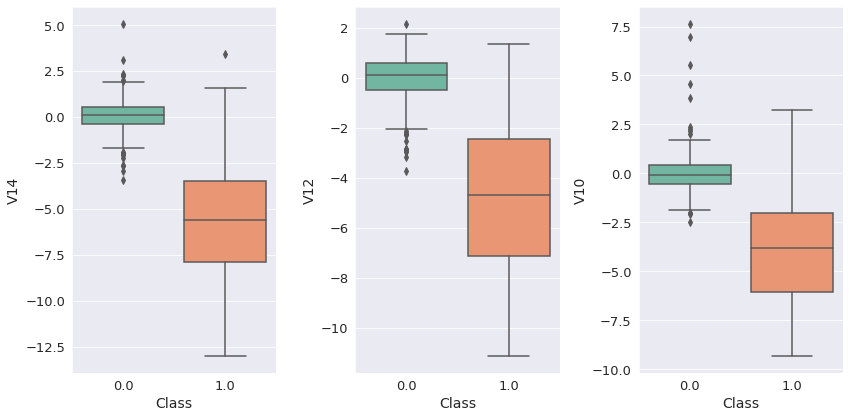

In [53]:
fig, ax = plt.subplots(ncols=3, figsize=(12,6), tight_layout = True)
sns.boxplot(x="Class",y="V14", data=balanced_df_train, ax=ax[0])
sns.boxplot(x="Class",y="V12", data=balanced_df_train, ax=ax[1])
sns.boxplot(x="Class",y="V10", data=balanced_df_train, ax=ax[2])

plt.show()

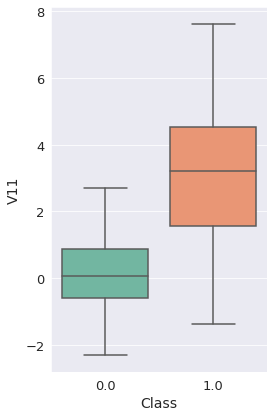

In [54]:
plt.figure(figsize=(4,6), tight_layout = True)
sns.boxplot(x="Class",y="V11", data=balanced_df_train)
plt.show()

In [55]:
y_balanced = balanced_df_train.Class
X_balanced = balanced_df_train.loc[:, balanced_df_train.columns != 'Class']

In [56]:
param_grid = {'C': [0.1,0.5,1,10], 'max_iter' : [500, 750], 'tol':[0.00001,0.0001, 0.001]}
lr_grid = GridSearchCV(LogisticRegression(solver = 'liblinear'),param_grid, cv=5)
lr_grid.fit(X_balanced, y_balanced)
print(lr_grid.best_score_)    
print(lr_grid.best_params_)
print(lr_grid.best_estimator_)

0.9436078293070006
{'C': 1, 'max_iter': 500, 'tol': 1e-05}
LogisticRegression(C=1, max_iter=500, solver='liblinear', tol=1e-05)


In [57]:
lr_model = LogisticRegression(C=0.5, max_iter=500, solver='liblinear', tol=1e-05)
lr_model.fit(X_balanced, y_balanced)
lr_yhat = lr_model.predict(X_balanced)
print(classification_report(y_balanced, lr_yhat))

              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96       297
         1.0       0.99      0.91      0.95       235

    accuracy                           0.96       532
   macro avg       0.96      0.95      0.96       532
weighted avg       0.96      0.96      0.96       532



In [58]:
param_grid = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
knn_grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
knn_grid.fit(X_balanced, y_balanced)

print(knn_grid.best_score_)    
print(knn_grid.best_params_)
print(knn_grid.best_estimator_)

0.9285663904073356
{'algorithm': 'auto', 'n_neighbors': 3}
KNeighborsClassifier(n_neighbors=3)


In [59]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_balanced, y_balanced)
knn_yhat = knn_model.predict(X_balanced)
print(classification_report(y_balanced, knn_yhat))

              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96       297
         1.0       0.99      0.91      0.95       235

    accuracy                           0.96       532
   macro avg       0.96      0.95      0.96       532
weighted avg       0.96      0.96      0.96       532



In [60]:
param_grid = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
svc_grid = GridSearchCV(SVC(), param_grid, cv=5)
svc_grid.fit(X_balanced, y_balanced)

print(svc_grid.best_score_)    
print(svc_grid.best_params_)
print(svc_grid.best_estimator_)

0.9417563040028215
{'C': 0.9, 'kernel': 'linear'}
SVC(C=0.9, kernel='linear')


In [61]:
svc_model = SVC(C=0.5, kernel='linear')
svc_model.fit(X_balanced, y_balanced)
svc_yhat = svc_model.predict(X_balanced)
print(classification_report(y_balanced, svc_yhat))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       297
         1.0       1.00      0.92      0.96       235

    accuracy                           0.96       532
   macro avg       0.97      0.96      0.96       532
weighted avg       0.97      0.96      0.96       532

